## Implementing Ridge Regression(L2 regularization) using sklearn
We are now going to implement the same algorithm using sklearn

#### Importing Libraries

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

#### Importing Data

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Salary_Data.csv")

In [107]:
df.shape

(30, 2)

In [108]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Selecting Dependent Variable & Independent Varible 

In [110]:
X = df.iloc[:,:1]         # Independent Varible (Year Of Experiance)
y = df.iloc[:,-1]         # Dependent varible (Salary)

#### And now we split the data into training and testing. With shuffeling of course. And we reshape the training and testing X value.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Then we fit our linear regression model.

In [112]:
from sklearn.linear_model import LinearRegression
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train,y_train)

LinearRegression()

We can then test our model with the predict function and see how well it did with the mean_squared_error function

In [113]:
from sklearn.metrics import mean_squared_error
predicted_y = simple_linear_regression.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predicted_y))

print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 6275.012442603713


#### Slope of best fit Line

In [114]:
m= simple_linear_regression.coef_[0]
m

9547.660565249666

#### Intercept of best Fit line

In [115]:
b = simple_linear_regression.intercept_
b

24818.6255014735

#### Equation of best fit line

In [116]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (9547.660565249666 * X)+ 24818.6255014735


In [117]:
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(8,4))
    plt.scatter(x,y,color = "g", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "r", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Year of Experiance & Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
 
    # function to show plot
    plt.show()

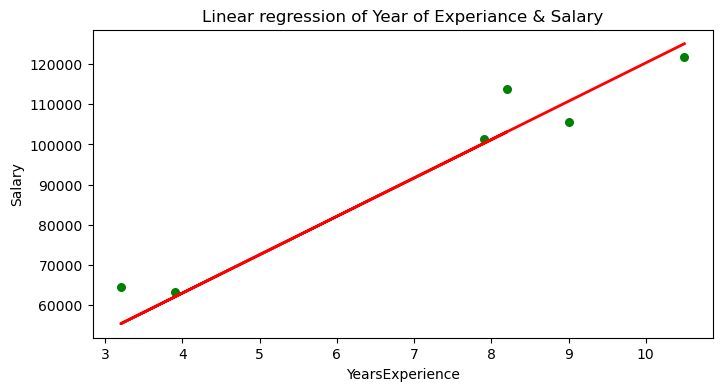

In [118]:
plot_linear_regression_result(X_test,y_test,predicted_y)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_y)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predicted_y, squared=False)

# Calculate R-squared (R2) Score
r2_linear = r2_score(y_test, predicted_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 5059.9008176048765
Mean Squared Error (MSE): 39375781.15483142
Root Mean Squared Error (RMSE): 6275.012442603713
R-squared (R2) Score: 0.9604756941484595


#### Accuracy of model

In [121]:
print("Accuacy of model:-", r2*100)

Accuacy of model:- 96.04756941484595


#### Predication model

In [122]:
def predication(X):
    Y = (26858.283390428558 * X)+ 9257.234097109678
    return Y

In [123]:
predication(2.2)

68345.45755605251

#### Comparsion of Predicated value & Actual value

In [124]:
pd.DataFrame({"Predicated Value" : predicted_y,
              "Actual Value" : y_test})

,Predicated Value,Actual Value
22,100245.143967,101302.0
23,103109.442137,113812.0
10,62054.501706,63218.0
8,55371.139310,64445.0
25,110747.570589,105582.0
29,125069.061437,121872.0


# ---------------  Ridge Regression(L2 regularization) -------------------
```python
Ridge regression is a regularization technique used in linear regression to mitigate the problem of multicollinearity and overfitting. It adds a penalty term to the loss function, which is proportional to the square of the magnitude of the coefficients (L2 regularization). This penalty encourages smaller coefficients and helps in reducing model complexity.
```
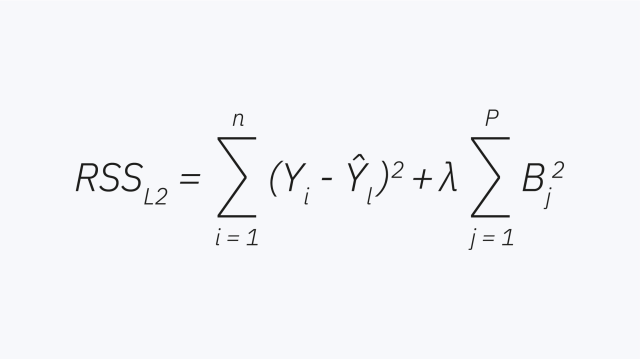

#### Importing model

In [125]:
from sklearn.linear_model import Ridge          # Import Ridge regression model
from sklearn.model_selection import GridSearchCV     # Import GridSearchCV for hyperparameter tuning

#### Instantiate Ridge Model

In [126]:
ridge=Ridge()           # Create an instance of the Ridge regression model

In [127]:
ridge

Ridge()

#### Define Hyperparameter Grid
#### Define a dictionary containing the values of the regularization parameter (alpha) to be tested

In [128]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

#### Create a GridSearchCV object:
```python
   - ridge: The estimator (Ridge regression model)
   - parameters: The parameter grid to search over
   - scoring='neg_mean_squared_error': The scoring metric to optimize (negative mean squared error).
   - cv=5: Cross-validation strategy (5-fold cross-validation)
```

In [129]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

#### Fit GridSearchCV
#### Fit the GridSearchCV object on the data (X features and y target)

In [130]:
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

#### Print the best parameters found by GridSearchCV
#### Print the best mean squared error score achieved by the Ridge regression model with the best parameters

In [131]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-40653827.66045602


#### Instantiate Ridge model with best parameters

In [132]:
best_alpha = ridge_regressor.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha)

#### Fit the model on the training data

In [133]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

#### Predict on the test data

In [134]:
y_pred_ridge = ridge_model.predict(X_test)

#### Slope of ridge_model best fit line

In [135]:
m= ridge_model.coef_[0]
m

9269.621278857287

#### Intercept of ridge_model best fit line 

In [136]:
b = ridge_model.intercept_
b

26170.59153155645

#### best fit line of ridge_model 

In [137]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (9269.621278857287 * X)+ 26170.59153155645


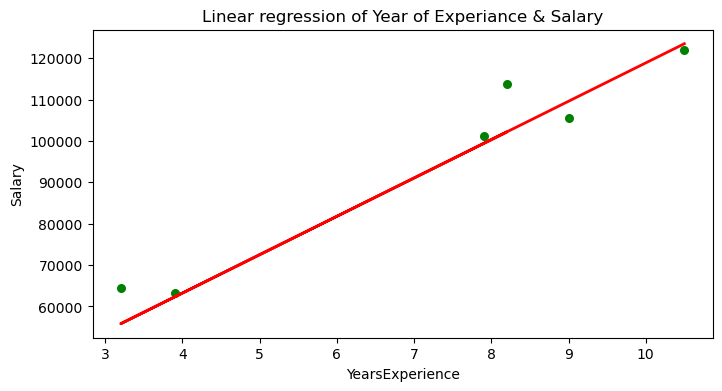

In [138]:
plot_linear_regression_result(X_test,y_test,y_pred_ridge)

In [139]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

Mean Squared Error (MSE) for Ridge: 38770689.14987762


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_ridge)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ridge)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Calculate R-squared (R2) Score
r2_Ridge = r2_score(y_test, y_pred_ridge)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 4780.703034185859
Mean Squared Error (MSE): 38770689.14987762
Root Mean Squared Error (RMSE): 6226.611369748205
R-squared (R2) Score: 0.9604756941484595


In [141]:
print("Accuacy of model:-", r2*100)

Accuacy of model:- 96.04756941484595


In [142]:
pd.DataFrame({"Actual Value" : y_test,
              "Predicated Value" : predicted_y,
              "Ridge model predicted" : y_pred_ridge
             })

,Actual Value,Predicated Value,Ridge model predicted
22,101302.0,100245.143967,99400.599635
23,113812.0,103109.442137,102181.486018
10,63218.0,62054.501706,62322.114519
8,64445.0,55371.139310,55833.379624
25,105582.0,110747.570589,109597.183041
29,121872.0,125069.061437,123501.614960


#### Comaprsion of Actual value Predicated_y, Lasso model prediucted

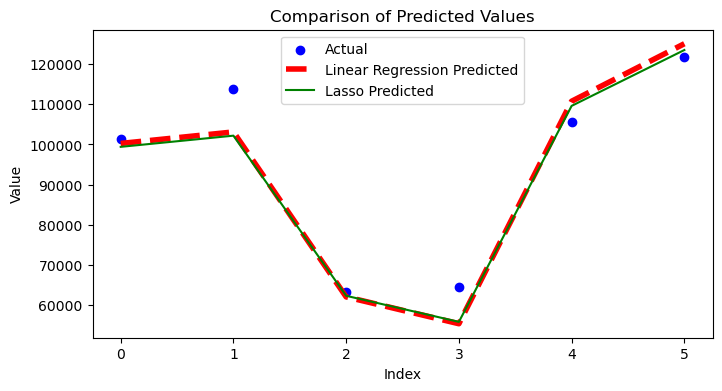

In [143]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(8, 4))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot linear regression predicted values (dotted line with thicker width)
plt.plot(range(len(predicted_y)), predicted_y, color='red', linestyle='--', linewidth=4, label='Linear Regression Predicted')

# Plot Lasso regression predicted values
plt.plot(range(len(y_pred_ridge)), y_pred_ridge, color='green', label='Lasso Predicted')

plt.title('Comparison of Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [41]:
def predict(X):
    Y = (8960.588372619652 * X)+ 28207.46004561679
    return round(Y,2)

In [132]:
experience = 3
print(f"Salary with {experience} Experience: {predict(experience)}")


Salary with 3 Experience: 55089.23


#### Improvement after Using Ridge Regression

In [148]:
improve  = r2_Ridge - r2_linear
print("After Apply Ridge Regession improvement in model:- ",improve*100,"%")

After Apply Ridge Regession improvement in model:-  0.11447846344442292 %
